[View in Colaboratory](https://colab.research.google.com/github/khanyofficial/inkers1/blob/master/3A_trial_003.ipynb)

(60000, 28, 28)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 52s 872us/step - loss: 0.2293 - acc: 0.9290
Epoch 2/10
60000/60000 [==============================] - 52s 869us/step - loss: 0.0730 - acc: 0.9776
Epoch 3/10
60000/60000 [==============================] - 53s 876us/step - loss: 0.0563 - acc: 0.9831
Epoch 4/10
60000/60000 [==============================] - 52s 870us/step - loss: 0.0480 - acc: 0.9853
Epoch 5/10
60000/60000 [==============================] - 53s 877us/step - loss: 0.0414 - acc: 0.9874
Epoch 6/10
60000/60000 [==============================] - 52s 871us/step - loss: 0.0369 - acc: 0.9885
Epoch 7/10
60000/60000 [==============================] - 52s 861us/step - loss: 0.0338 - acc: 0.9888
Epoch 8/10
60000/60000 [==============================] - 52s 860us/step - loss: 0.0304 - acc: 0.9903
Epoch 9/10
60000/60000 [==============================] - 51s 858us/step - loss: 0.0278 - acc: 0.9911
Epoch 10/10
60000/60000 [==============================] - 52s 861us/step - loss: 

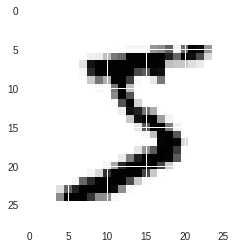

In [3]:
#https://learn.inkers.ai/courses/1/pages/session-1-%7C-ml-basics?module_item_id=1

import keras
import numpy as np
import time

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from keras.layers import Activation
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
Y_train[:10]


start = time.time()
model = Sequential()
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])


model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)
y_pred = model.predict(X_test)
#print(y_pred[:9])
#print(y_test[:9])
layer_dict = dict([(layer.name, layer) for layer in model.layers])
print(model.summary())
end = time.time()
print("time taken to execute in secs - " , end - start)
